# Parameterized Rotation Gates

All of the gates we have visited so far bring us to various points on the Bloch sphere, but what about all of the other spaces on the sphere we have not visited? 
<br>
We can use a parameterized rotation gate!

Rotate a specified angle around the x, y, or z axes of the Block sphere. 

#### Take a deep breath here...

$
R_X(\theta)
=\begin{bmatrix}cos(\frac{\theta}{2})&-i*sin(\frac{\theta}{2})\cr-i*sin(\frac{\theta}{2})&cos(\frac{\theta}{2})\end{bmatrix}
$

$
R_Y(\theta)
=\begin{bmatrix}cos(\frac{\theta}{2})&-sin(\frac{\theta}{2})\cr sin(\frac{\theta}{2})&cos(\frac{\theta}{2})\end{bmatrix}
$

$\theta$ in the $R_X$ and $R_Y$ gates is used to determine how many radians to rotate around the x or y axes on the Bloch sphere.

$
R_Z(\phi)
=\begin{bmatrix}e^{-\frac{i\phi}{2}}&0\cr 0&e^{\frac{i\phi}{2}}\end{bmatrix}
$

$\phi$ in the $R_Z$ gate is used because we apply the rotation around the z-axis which only affects the phase of a qubit. 

#### Phew!

You might be wondering now, wouldn't $R_X(\pi)=X$ since both rotate the qubit around the x-axis $\pi$ radians.
<br>
The answer is kind of, but the math used to do the rotation is different. 

$
R_X(\pi)
=\begin{bmatrix}cos(\frac{\pi}{2})&-i*sin(\frac{\pi}{2})\cr-i*sin(\frac{\pi}{2})&cos(\frac{\pi}{2})\end{bmatrix}
=\begin{bmatrix}0&-i\cr-i&0\end{bmatrix}
=-i\begin{bmatrix}0&1\cr1&0\end{bmatrix}
=-iX
$
<br>
<br>
If we factor out the $-i$, we do get the Pauli-X matrix.

$
R_Y(\pi)
=\begin{bmatrix}cos(\frac{\pi}{2})&-sin(\frac{\pi}{2})\cr sin(\frac{\pi}{2})&cos(\frac{\pi}{2})\end{bmatrix}
=\begin{bmatrix}0&-1\cr1&0\end{bmatrix}
=i\begin{bmatrix}0&-i\cr i&0\end{bmatrix}
=iY
$
<br>
<br>
Similarly, if we factor out $i$ from the $R_Y$ gate's result, we can get the Pauli-Y matrix.

$
R_Z(\pi)
=\begin{bmatrix}e^{-\frac{i\pi}{2}}&0\cr 0&e^{\frac{i\pi}{2}}\end{bmatrix}
=\begin{bmatrix}-i&0\cr 0&i\end{bmatrix}
=-i\begin{bmatrix}1&0\cr 0&-1\end{bmatrix}
=-iZ
$
<br>
<br>
And again with the $R_Z$ gate, we can get the Pauli-Z matrix by factoring out $-i$.

In each of these examples, $i$ and $-i$ are another example of a global phase. 
<br>
They are mathematical artifacts that don't affect the quantum state in an observable way. 

## Parameterized Rotation Gates in Qiskit

In [37]:
from qiskit import *
from qiskit_aer import * 
from qiskit.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
%matplotlib inline

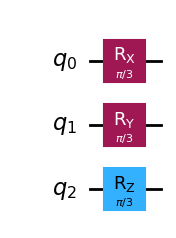

In [38]:
circuit = QuantumCircuit(3)
circuit.rx(pi/3, 0)
circuit.ry(pi/3, 1)
circuit.rz(pi/3, 2)
circuit.draw(output='mpl');

In [39]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

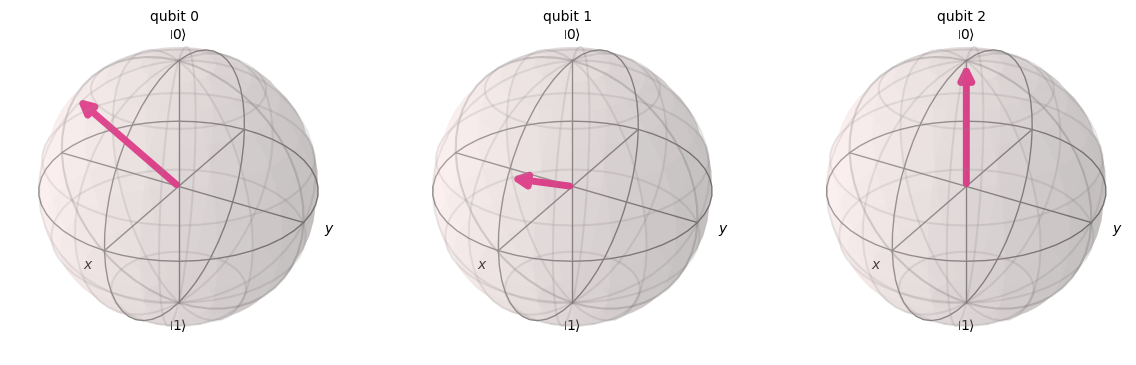

In [40]:
plot_bloch_multivector(statevector);

We can see that the $R_X$ and $R_Y$ rotated $\frac{\pi}{3}$ radians or $60\degree$ around the x and y axes respectively.
<br>
However there was no noticeable change to the last qubit since a rotation around the z-axis in the $\ket{0}$ or $\ket{1}$ basis states will not produce a noticeable change. 
<br>
Let's apply a $H$ gate to the last qubit before the $R_Z$ gate so we can see the effects of the $R_Z$ gate. 

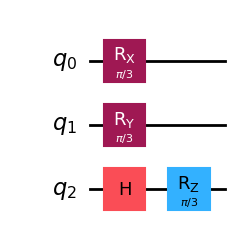

In [41]:
circuit = QuantumCircuit(3)
circuit.rx(pi/3, 0)
circuit.ry(pi/3, 1)
circuit.h(2)
circuit.rz(pi/3, 2)
circuit.draw(output='mpl');

In [42]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

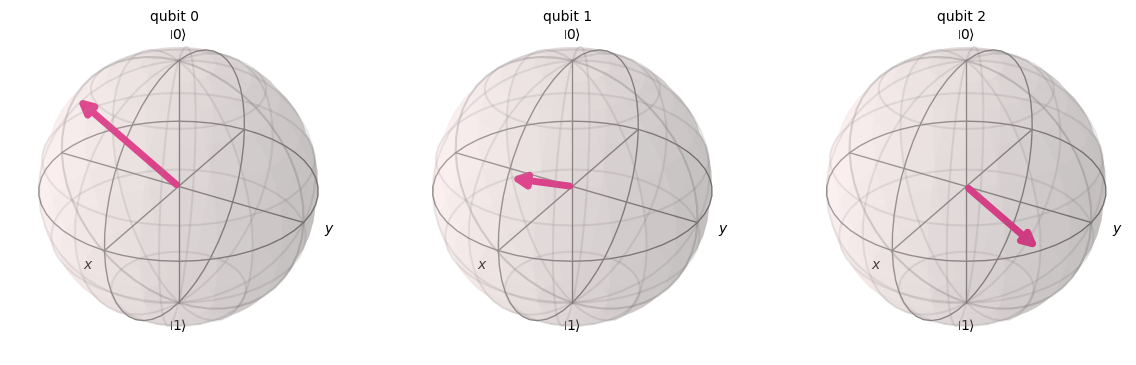

In [43]:
plot_bloch_multivector(statevector);

Now we can see that the last qubit rotated $\frac{\pi}{3}$ radians from $\ket{+}$ towards $\ket{i}$.

We can also pass in any number, not just radians and positive or negative, to the parameterized rotation gates.
<br>
Let's modify our circuit again using different input values for the rotation. 

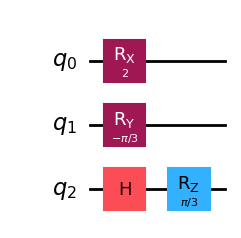

In [44]:
circuit = QuantumCircuit(3)
circuit.rx(2, 0)
circuit.ry(-pi/3, 1)
circuit.h(2)
circuit.rz(pi/3, 2)
circuit.draw(output='mpl');

In [45]:
simulator = StatevectorSimulator()
sim_result = simulator.run(circuit).result()
statevector = sim_result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

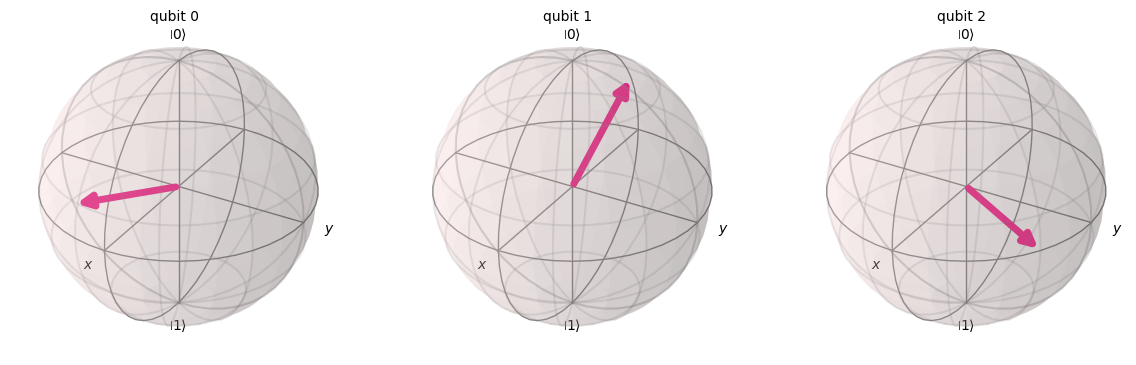

In [46]:
plot_bloch_multivector(statevector);